# Explore here

In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import f_classif, SelectKBest
from pickle import dump
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [18]:
database_URL="https://raw.githubusercontent.com/4GeeksAcademy/logistic-regression-project-tutorial/main/bank-marketing-campaign-data.csv"
database=pd.read_csv(database_URL,sep=";")
database.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [19]:
database.shape

(41188, 21)

In [20]:
database.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [21]:
database.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

La base de datos cuenta con 21 columnas, variables, y 41.188 filas, clientes. El tipo de datos se distribuyen en 10 filas de datos númericos y 11 filas de datos objeto. 
Contamos con valores nulos que no son detectados por el sistema al expresarse la falta de información como un string. Trataremos de ello en los próximos pasos.

Columnas que podemos suprimir por no ser relevantes a nuestro problema:
 #   Column           
---  ------          --------------  -----  

 7   contact        
 8   month           
 9   day_of_week      
 10  duration          
 11  campaign          
 12  pdays             
 13  previous         
 14  poutcome        
 15  emp.var.rate    
 16  cons.price.idx
 17  cons.conf.idx  
 18  euribor3m      
 19  nr.employed    


Eliminamos las columnas de datos que no son relevantes a nuestro modelo.

In [22]:
database.drop(["contact","month","day_of_week","duration","campaign","pdays","previous","poutcome","emp.var.rate","cons.price.idx","cons.conf.idx","euribor3m","nr.employed"],axis=1,inplace=True)

In [23]:
database.head(1)

,age,job,marital,education,default,housing,loan,y
0,56,housemaid,married,basic.4y,no,no,no,no


TRATAMIENTO DE DATOS DUPLICADOS

In [24]:
database.duplicated().sum()

np.int64(26097)

Contamos con valores duplicados, no obstante, al tratarse de datos no personalizados decidimos mantenerlos. No tenemos una variable de identidad para saber si los datos de la fila corresponde o no a la misma persona.

ANÁLISIS DE VARIABLES CATEGÓRICAS

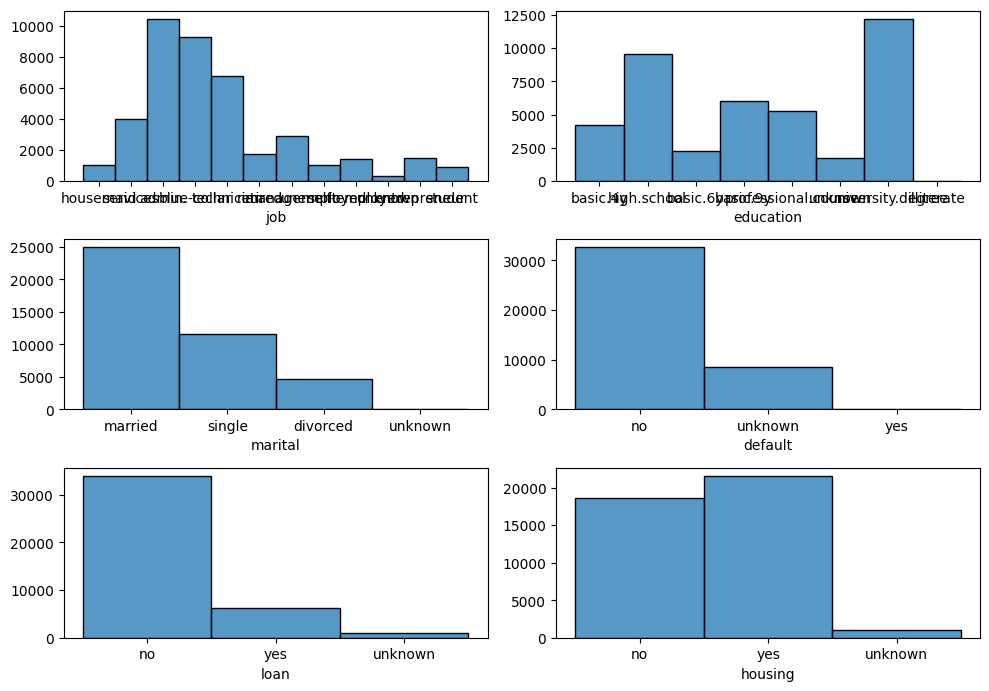

In [25]:
fig, axis = plt.subplots(3,2,figsize = (10,7))

# Create a multiple histogram

sns.histplot(ax = axis[0,0], data = database, x = "job").set(ylabel = None)
sns.histplot(ax = axis[1,0], data = database, x = "marital").set(ylabel = None)
sns.histplot(ax = axis[2,0], data = database, x = "loan").set(ylabel = None)
sns.histplot(ax = axis[0,1], data = database, x = "education").set(ylabel = None)
sns.histplot(ax = axis[1,1], data = database, x = "default").set(ylabel = None)
sns.histplot(ax = axis[2,1], data = database, x = "housing").set(ylabel = None)

# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

TRANSFORMAMOS LOS VALORES CATERGÓRICOS EN NUMÉRICOS

In [26]:
factorize = pd.factorize(database["job"])
parsing_dict = {}
indices = factorize[1]
set_factor = list(set(factorize[0]))
for index in range(len(factorize[1])):
  parsing_dict.update({indices[index]: int(set_factor[index])})

with open("database_transform_job.json", "w") as f:
  json.dump(parsing_dict, f)
database["job_n"] = factorize[0]

###

factorize = pd.factorize(database["marital"])
parsing_dict = {}
indices = factorize[1]
set_factor = list(set(factorize[0]))
for index in range(len(factorize[1])):
  parsing_dict.update({indices[index]: int(set_factor[index])})

with open("database_transform_marital.json", "w") as f:
  json.dump(parsing_dict, f)
database["marital_n"] = factorize[0]

###

factorize = pd.factorize(database["education"])
parsing_dict = {}
indices = factorize[1]
set_factor = list(set(factorize[0]))
for index in range(len(factorize[1])):
  parsing_dict.update({indices[index]: int(set_factor[index])})

with open("database_transform_education.json", "w") as f:
  json.dump(parsing_dict, f)
database["education_n"] = factorize[0]

###

factorize = pd.factorize(database["default"])
parsing_dict = {}
indices = factorize[1]
set_factor = list(set(factorize[0]))
for index in range(len(factorize[1])):
  parsing_dict.update({indices[index]: int(set_factor[index])})

with open("database_transform_default.json", "w") as f:
  json.dump(parsing_dict, f)
database["default_n"] = factorize[0]

###

factorize = pd.factorize(database["housing"])
parsing_dict = {}
indices = factorize[1]
set_factor = list(set(factorize[0]))
for index in range(len(factorize[1])):
  parsing_dict.update({indices[index]: int(set_factor[index])})

with open("database_transform_housing.json", "w") as f:
  json.dump(parsing_dict, f)
database["housing_n"] = factorize[0]

###

factorize = pd.factorize(database["loan"])
parsing_dict = {}
indices = factorize[1]
set_factor = list(set(factorize[0]))
for index in range(len(factorize[1])):
  parsing_dict.update({indices[index]: int(set_factor[index])})

with open("database_transform_loan.json", "w") as f:
  json.dump(parsing_dict, f)
database["loan_n"] = factorize[0]

###

factorize = pd.factorize(database["y"])
parsing_dict = {}
indices = factorize[1]
set_factor = list(set(factorize[0]))
for index in range(len(factorize[1])):
  parsing_dict.update({indices[index]: int(set_factor[index])})

with open("database_transform_y.json", "w") as f:
  json.dump(parsing_dict, f)
database["y_n"] = factorize[0]

GRAFITAMOS LAS VARIABLES CATEGÓRICAS CON LA TARGET Y SU CORRELACIÓN

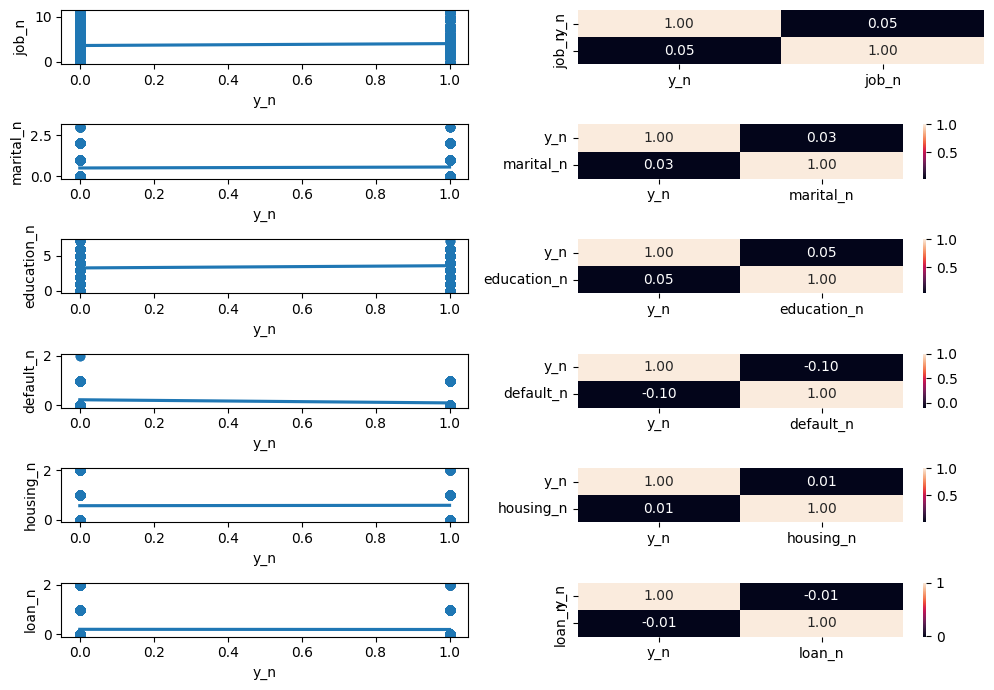

In [27]:
fig, axis = plt.subplots(6, 2, figsize = (10, 7))

sns.regplot(ax = axis[0, 0], data = database, x = "y_n", y = "job_n")
sns.heatmap(database[["y_n", "job_n"]].corr(), annot = True, fmt = ".2f", ax = axis[0,1], cbar = False)
sns.regplot(ax = axis[1, 0], data = database, x = "y_n", y = "marital_n")
sns.heatmap(database[["y_n", "marital_n"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])
sns.regplot(ax = axis[2, 0], data = database, x = "y_n", y = "education_n")
sns.heatmap(database[["y_n", "education_n"]].corr(), annot = True, fmt = ".2f", ax = axis[2, 1])
sns.regplot(ax = axis[3, 0], data = database, x = "y_n", y = "default_n")
sns.heatmap(database[["y_n", "default_n"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 1])
sns.regplot(ax = axis[4, 0], data = database, x = "y_n", y = "housing_n")
sns.heatmap(database[["y_n", "housing_n"]].corr(), annot = True, fmt = ".2f", ax = axis[4, 1])
sns.regplot(ax = axis[5, 0], data = database, x = "y_n", y = "loan_n")
sns.heatmap(database[["y_n", "loan_n"]].corr(), annot = True, fmt = ".2f", ax = axis[5, 1])

plt.tight_layout()

plt.show()

VARIABLE NUMÉRICA

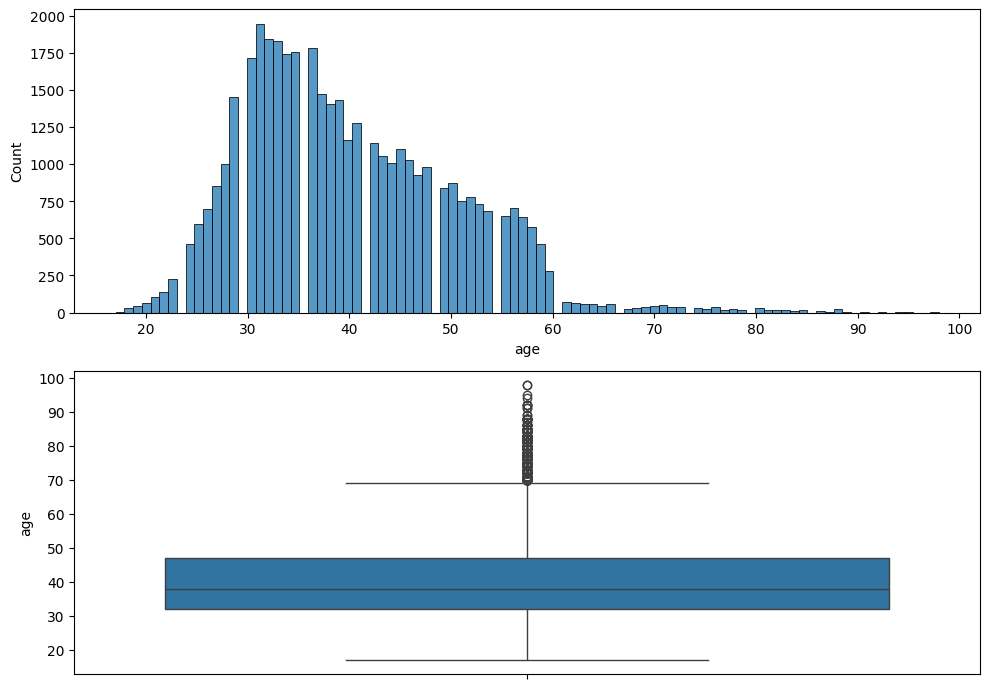

In [28]:
fig, axis = plt.subplots(2, 1, figsize = (10, 7))

plt.subplot
sns.histplot(ax=axis[0],data = database["age"])
sns.boxplot(ax=axis[1],data = database["age"])



# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

La edad muestra una gran cantidad de variables pero no podemos prescindir de estos datos puesto que son significativos en correlación con la target.

Si los quitaramos el modelo no aprendería adecuadamente sobre el problema.

CORRELACIÓN ENTRE LA TARGET Y EDAD

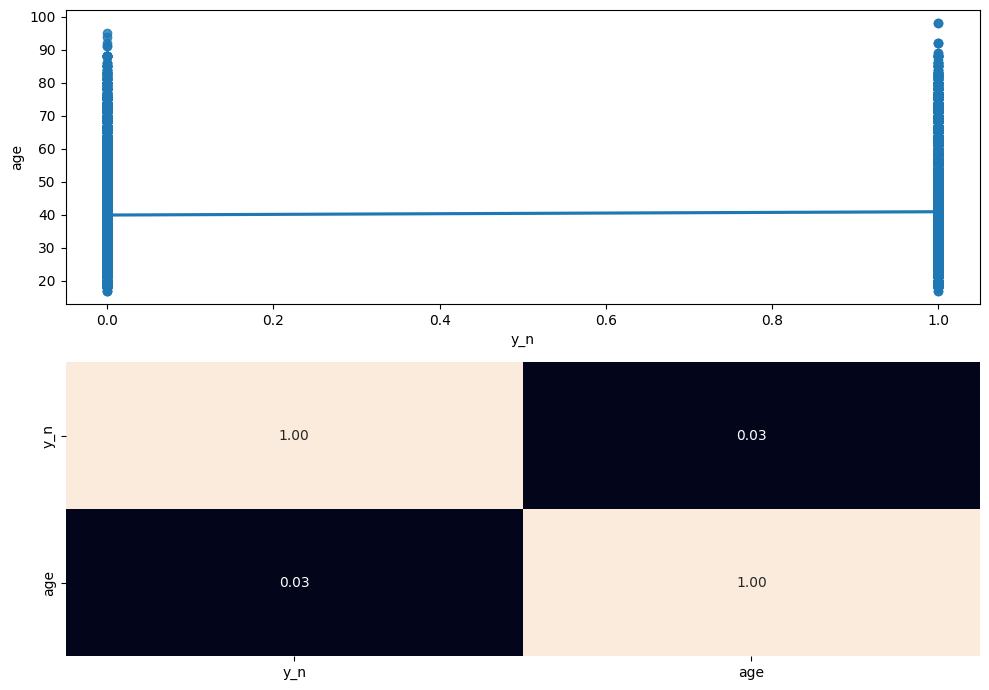

In [29]:
fig, axis = plt.subplots(2, 1, figsize = (10, 7))

sns.regplot(ax = axis[0], data = database, x = "y_n", y = "age")
sns.heatmap(database[["y_n", "age"]].corr(), annot = True, fmt = ".2f", ax = axis[1], cbar = False)

plt.tight_layout()

plt.show()

EXPLORACIÓN DE LA NUESTRO TARGET CON VARIAS VARIABLES PREDICTORAS

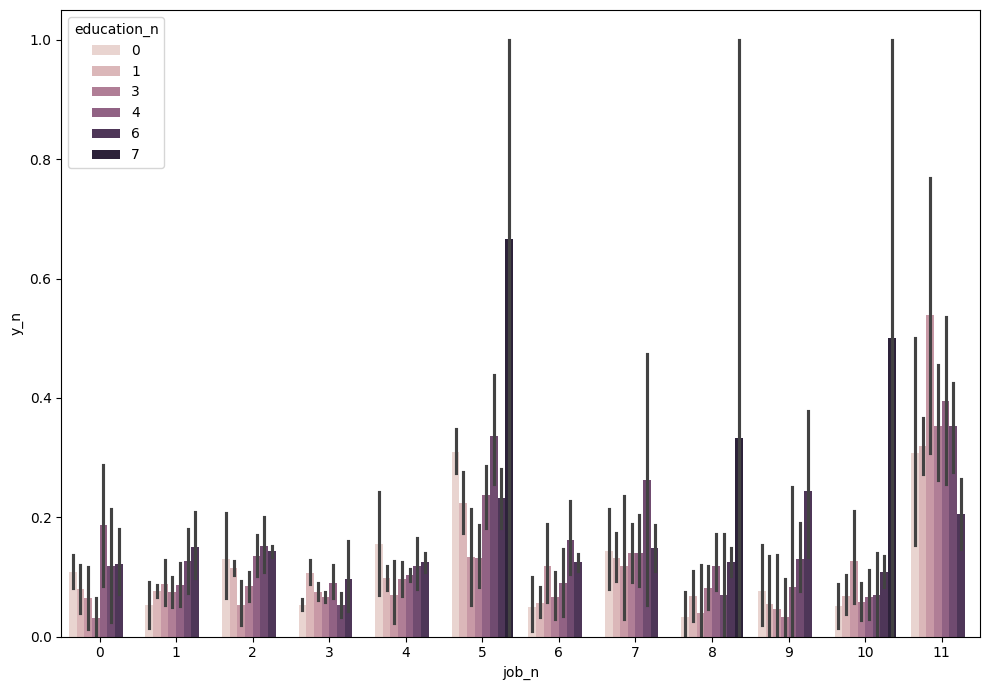

In [31]:
fig, ax = plt.subplots(1, 1, figsize = (10, 7))
sns.barplot(data = database, x = "job_n", y = "y_n", hue = "education_n")


plt.tight_layout()

plt.show()

{"housemaid": 0, "services": 1, "admin.": 2, "blue-collar": 3, "technician": 4, "retired": 5, "management": 6, "unemployed": 7, "self-employed": 8, "entrepreneur": 9, "student": 10}

Destacamos de la gráfica que las personas retiradas y con mayor educación son las que muestran más interés en la contratación de nuestra target.

ANÁLISIS COMPLETO DE LA CORRELACIÓN DE TODAS LAS VARIABLES PREDICTORAS.

In [ ]:
num = ['int64', 'float64']
cat = ['O']

df_num = database.select_dtypes(num)
df_cat = database.select_dtypes(cat)

In [ ]:
df_cat.head()

,job,marital,education,default,housing,loan,y
0,housemaid,married,basic.4y,no,no,no,no
1,services,married,high.school,unknown,no,no,no
2,services,married,high.school,no,yes,no,no
3,admin.,married,basic.6y,no,no,no,no
4,services,married,high.school,no,no,yes,no


In [ ]:
df_num.head()

,age,job_n,marital_n,education_n,default_n,housing_n,loan_n,y_n
0,56,0,0,0,0,0,0,0
1,57,1,0,1,1,0,0,0
2,37,1,0,1,0,1,0,0
3,40,2,0,2,0,0,0,0
4,56,1,0,1,0,0,1,0


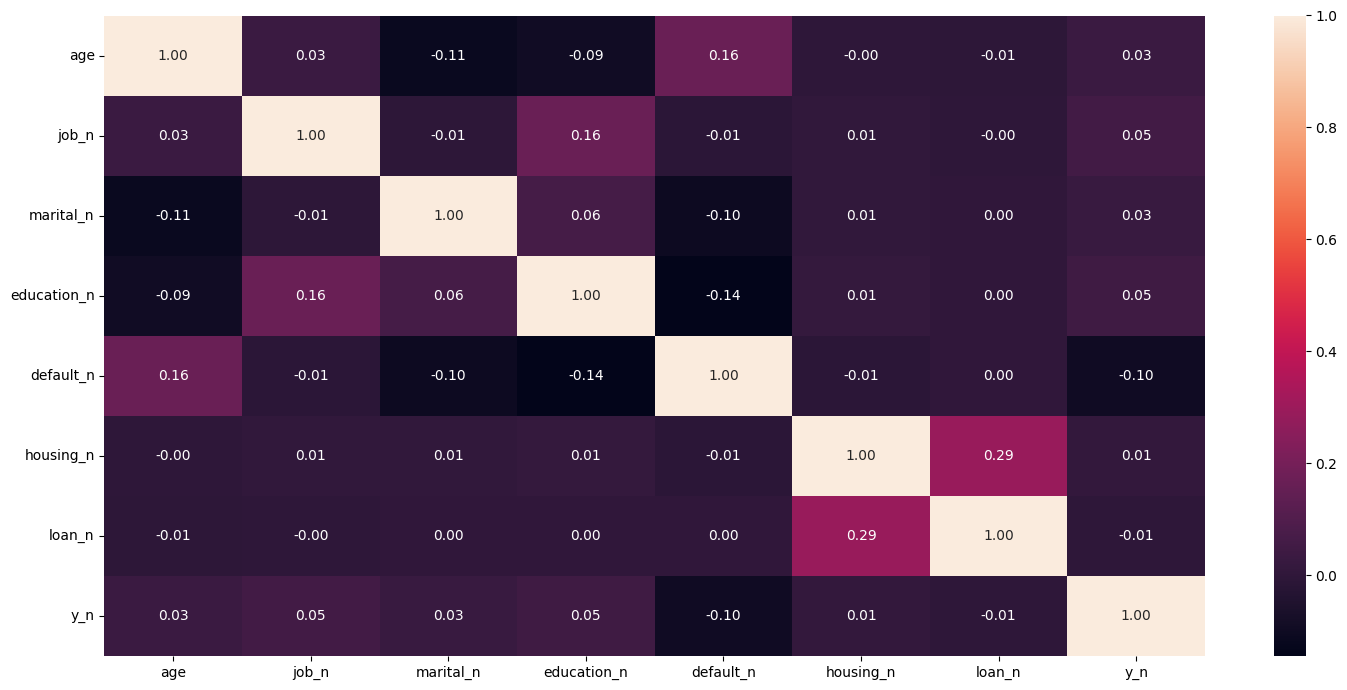

In [ ]:
fig, axis = plt.subplots(figsize = (15, 7))
sns.heatmap(df_num.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

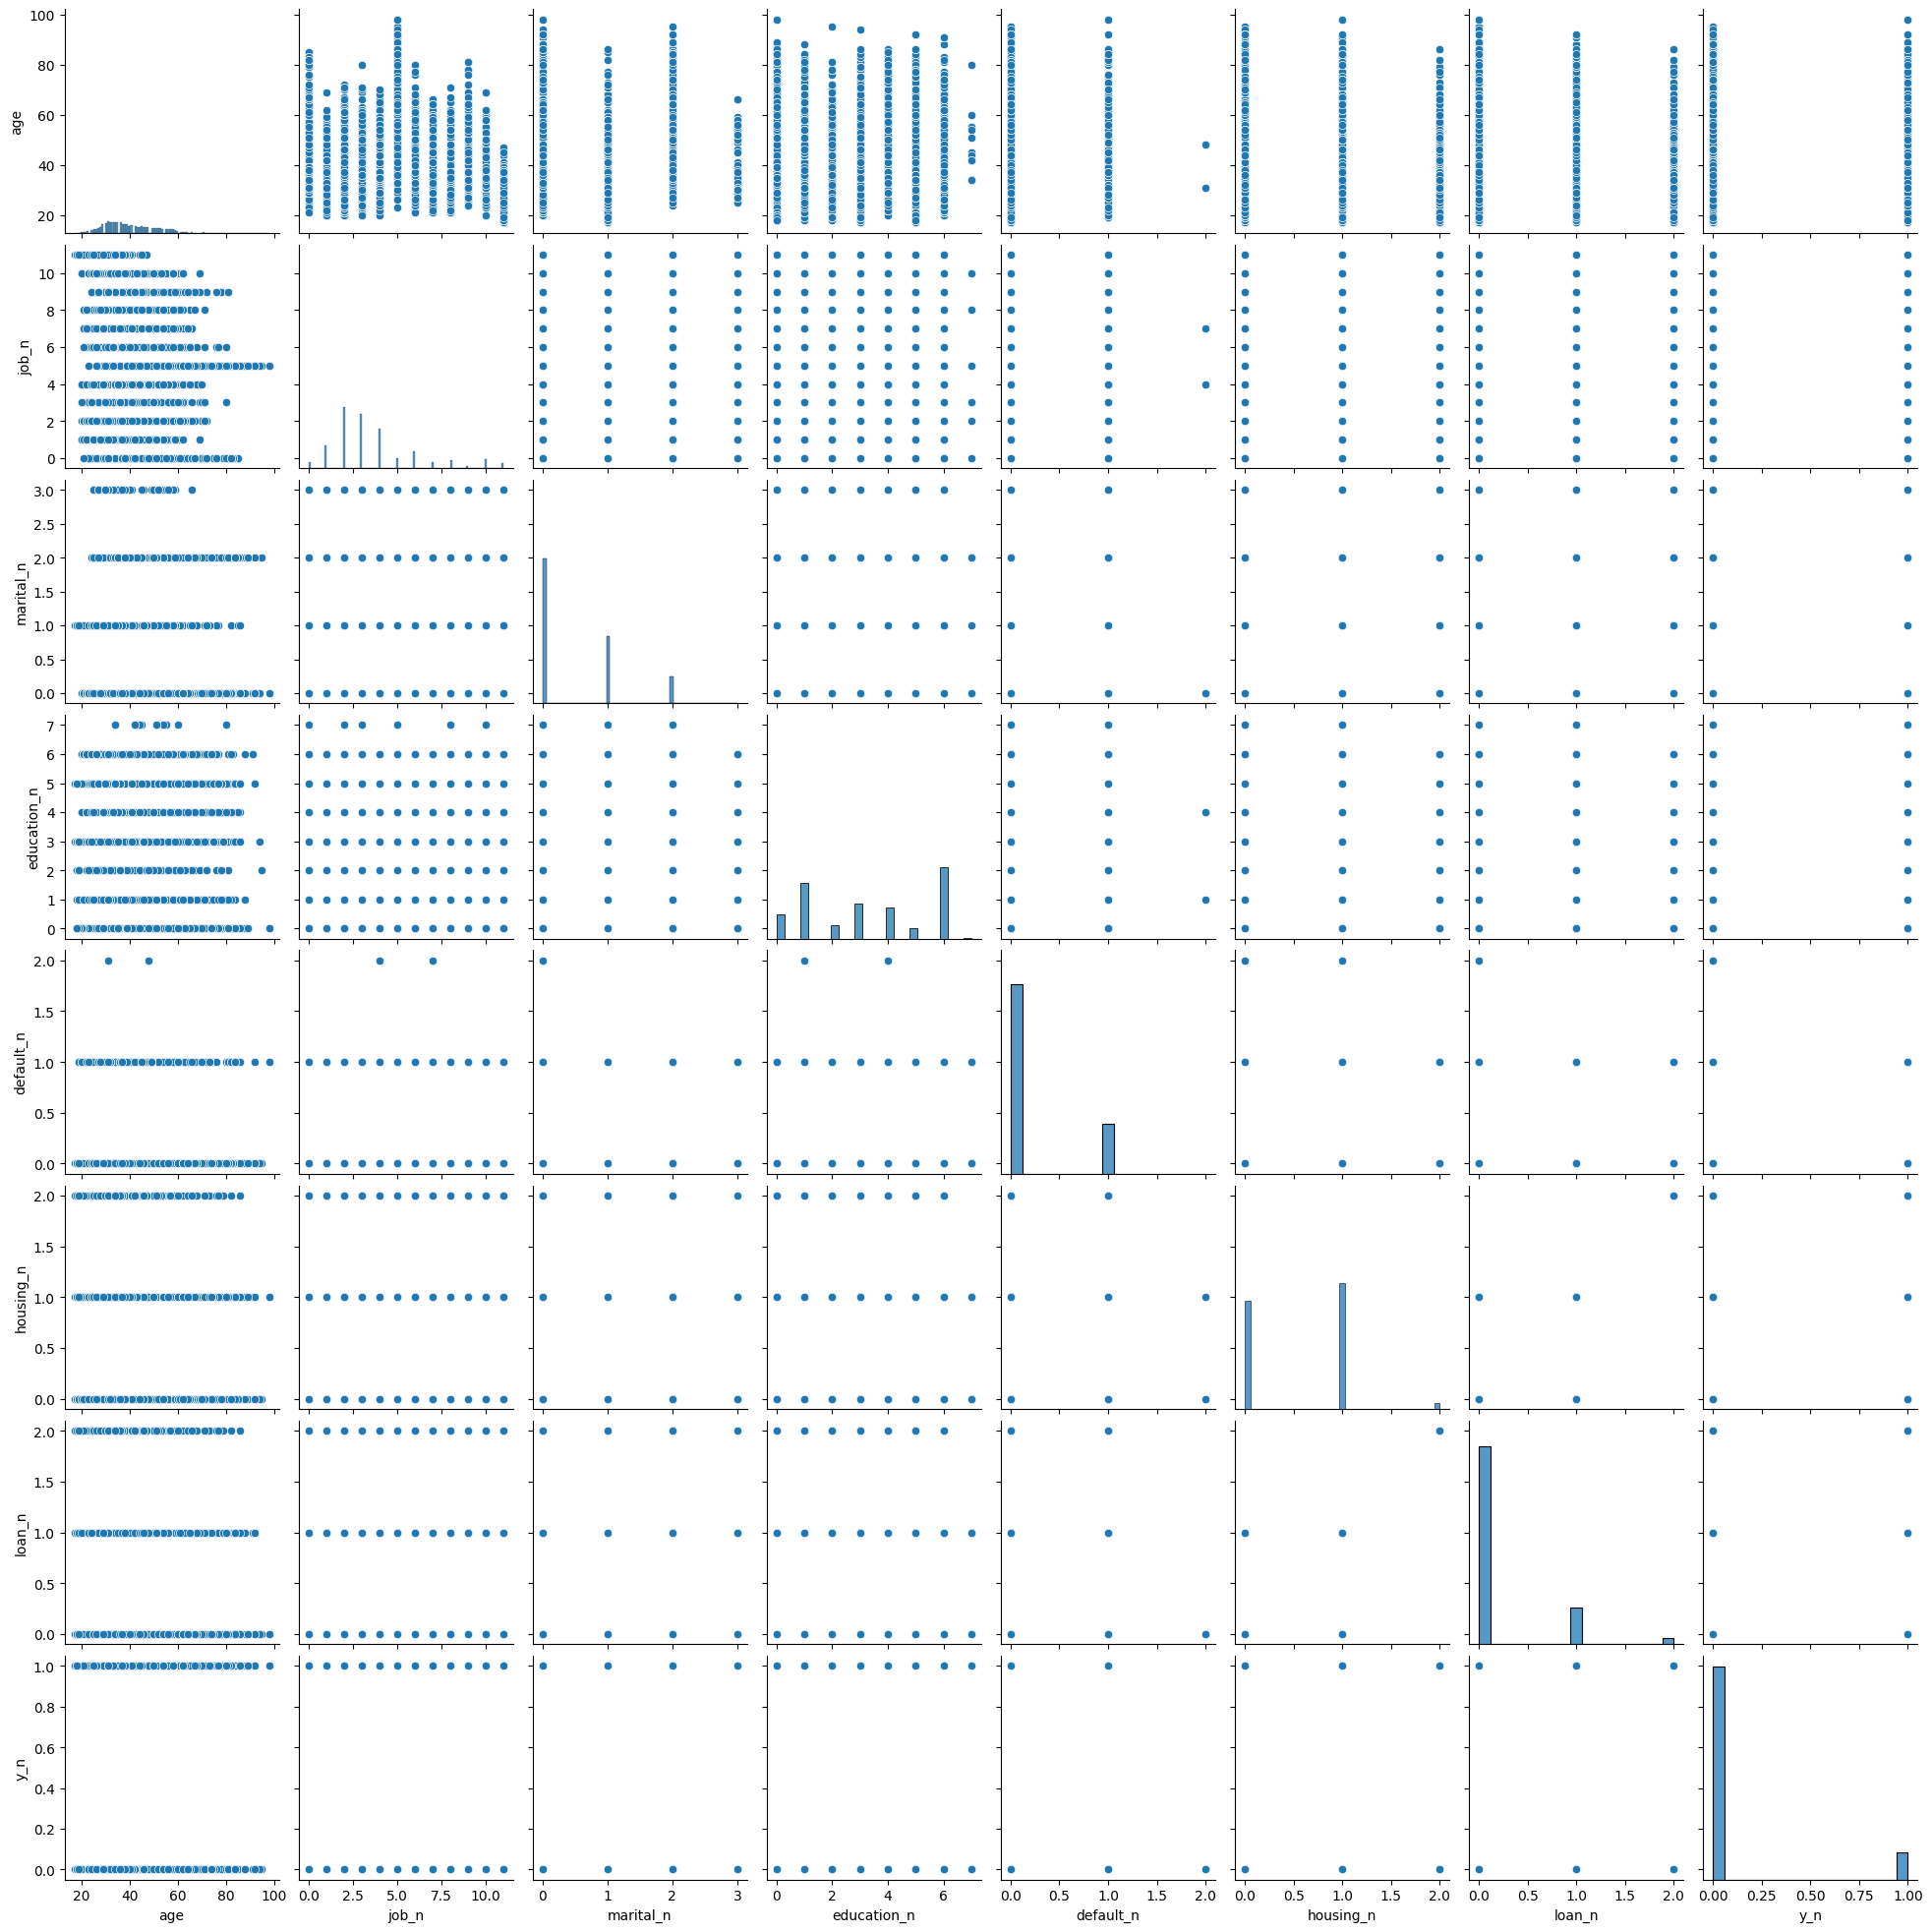

In [ ]:
sns.pairplot(data = df_num)

FEATURE ENGINEERING

OUTLIERS

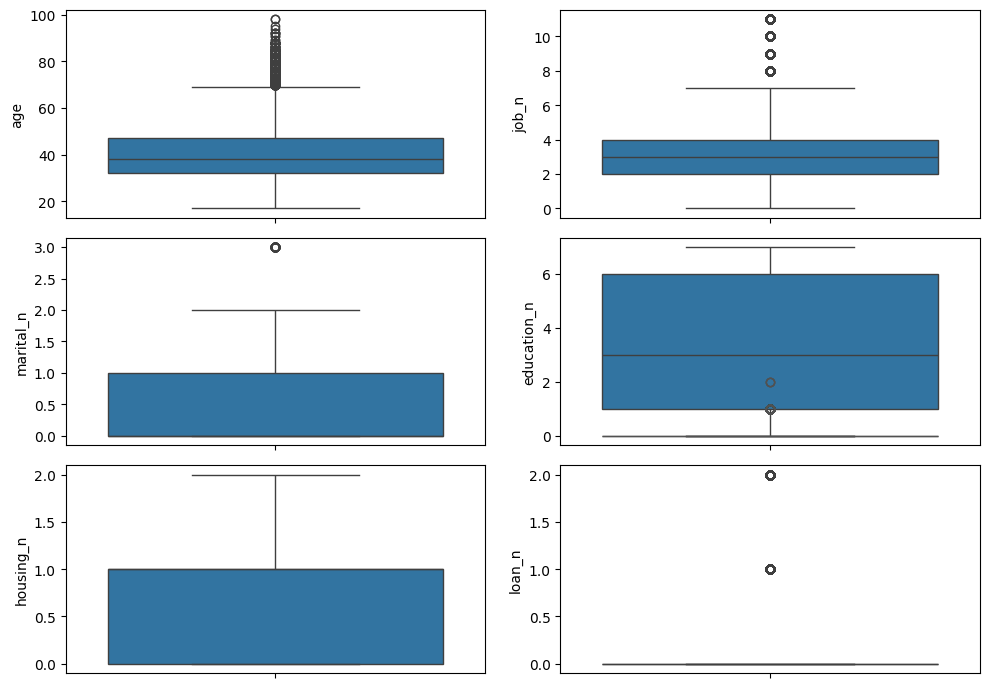

In [ ]:
fig, axis = plt.subplots(3, 2, figsize = (10, 7))

plt.subplot
sns.boxplot(ax=axis[0,0],data = database["age"])
sns.boxplot(ax=axis[0,1],data = database["job_n"])
sns.boxplot(ax=axis[1,0],data = database["marital_n"])
sns.boxplot(ax=axis[1,1],data = database["education_n"])
sns.boxplot(ax=axis[1,1],data = database["default_n"])
sns.boxplot(ax=axis[2,0],data = database["housing_n"])
sns.boxplot(ax=axis[2,1],data = database["loan_n"])



# Adjust the layout
plt.tight_layout()

# Show the plot
plt.show()

Las variables predictoras afectadas por outliers son "loan", "age" y "job_n", todas ellas con información relevante para nuestro modelo. 
Mantenemos los outliers.

TRATAMIENTO DE VALORES NULOS. REMPLAZAMOS EL STRING 'unknown', 'nonexistent' POR NaN

In [36]:
db_mod=database.copy()

In [37]:
db_mod.replace(['unknown', 'nonexistent'], np.nan, inplace=True)
db_mod.isna().sum()[db_mod.isna().sum()>0]/len(db_mod)

job          0.008012
marital      0.001942
education    0.042027
default      0.208726
housing      0.024036
loan         0.024036
dtype: float64

Variables predictoras afectadas por valores nulos: "marital","job","housing","loan","education","default".
AL tratarse de variables categóricas optamos por sustituir los nulos por la moda.

In [38]:
db_mod["marital"].fillna(db_mod["marital"].mode()[0], inplace = True)
db_mod["job"].fillna(db_mod["job"].mode()[0], inplace = True)
db_mod["housing"].fillna(db_mod["housing"].mode()[0], inplace = True)
db_mod["loan"].fillna(db_mod["loan"].mode()[0], inplace = True)
db_mod["education"].fillna(db_mod["education"].mode()[0], inplace = True)
db_mod["default"].fillna(db_mod["default"].mode()[0], inplace = True)

Comprobamos que los valores nulos han sido correctamente tratados.

In [39]:
db_mod.isnull().sum().sort_values(ascending=True)

age            0
job            0
marital        0
education      0
default        0
housing        0
loan           0
y              0
job_n          0
marital_n      0
education_n    0
default_n      0
housing_n      0
loan_n         0
y_n            0
dtype: int64

ANALISIS DE CORRELACIONES CON LOS VALORES NULOS TRATADOS

In [42]:
num = ['int64', 'float64']
cat = ['O']

df_num_mod = db_mod.select_dtypes(num)
df_cat_mod = db_mod.select_dtypes(cat)

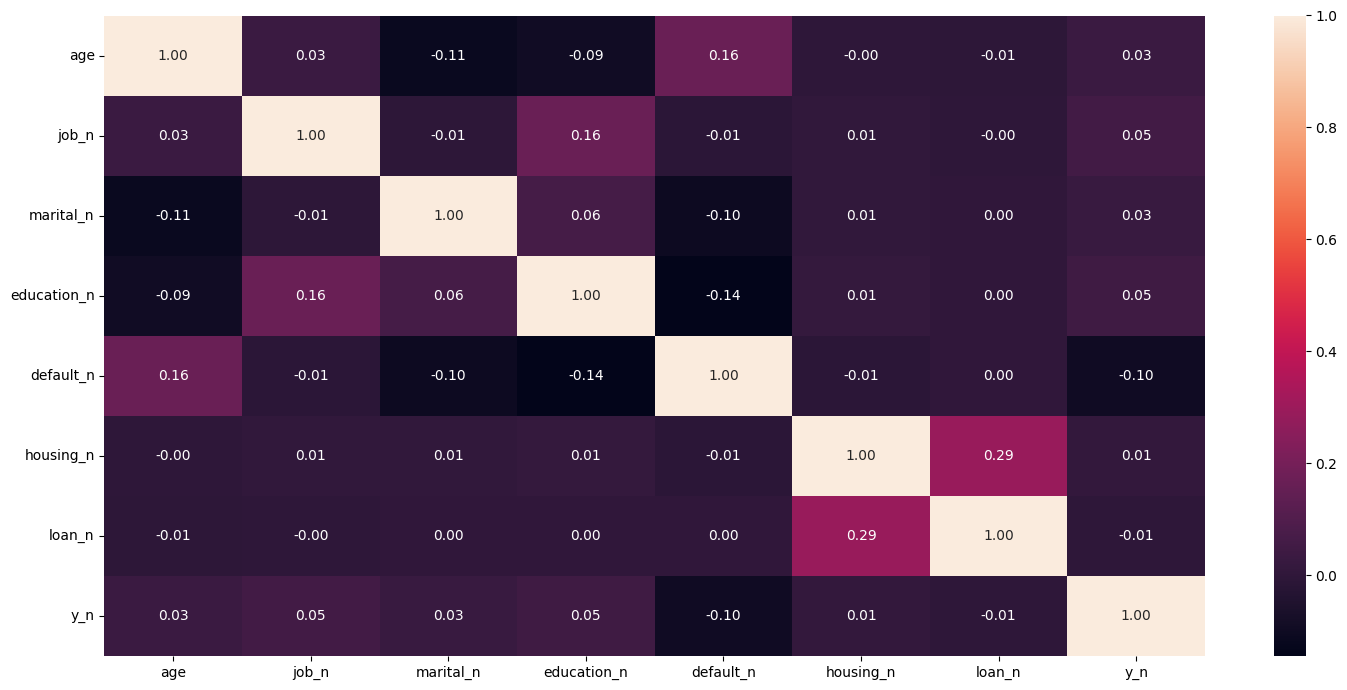

In [43]:
fig, axis = plt.subplots(figsize = (15, 7))
sns.heatmap(df_num_mod.corr(), annot = True, fmt = ".2f")

plt.tight_layout()

plt.show()

ESCALADO DE VALORES (feature scaling)

In [44]:
num_variables = ["job_n","marital_n","education_n","default_n","housing_n","loan_n","age"]

X = database.drop("y_n", axis = 1)[num_variables]
y = database["y_n"]

# # # # Dividimos el conjunto de datos en muestras de train y test
X_db = database.drop("y_n", axis = 1)[num_variables]
y_db = database["y_n"]
X_dbmod = db_mod.drop("y_n", axis = 1)[num_variables]
y_dbmod = db_mod["y_n"]

X_db_train, X_db_test, y_train, y_test = train_test_split(X_db, y_db, test_size = 0.2, random_state = 42)
X_dbmod_train, X_dbmod_test,_,_ = train_test_split(X_dbmod, y_dbmod, test_size = 0.2, random_state = 42)


In [49]:
X_db_train.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,age
12556,3,0,3,1,1,0,40
35451,2,0,6,0,0,0,31
30592,5,0,0,0,0,0,59
17914,0,2,3,0,1,0,43
3315,2,1,1,1,0,0,39


In [50]:
X_dbmod_train

,job_n,marital_n,education_n,default_n,housing_n,loan_n,age
12556,3,0,3,1,1,0,40
35451,2,0,6,0,0,0,31
30592,5,0,0,0,0,0,59
17914,0,2,3,0,1,0,43
3315,2,1,1,1,0,0,39
...,...,...,...,...,...,...,...
6265,5,0,4,1,0,0,58
11284,6,0,6,0,0,0,37
38158,2,0,1,0,1,0,35
860,6,0,6,0,1,0,40


NORMALIZACIÓN

In [51]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_db_train)
scaler.fit(X_dbmod_train)

X_db_train_norm = scaler.transform(X_db_train)
X_db_train_norm = pd.DataFrame(X_db_train_norm, index = X_db_train.index, columns = num_variables)

X_dbmod_train_norm = scaler.transform(X_dbmod_train)
X_dbmod_train_norm = pd.DataFrame(X_dbmod_train_norm, index = X_dbmod_train.index, columns = num_variables)


X_db_test_norm = scaler.transform(X_db_test)
X_db_test_norm = pd.DataFrame(X_db_test_norm, index = X_db_test.index, columns = num_variables)


X_dbmod_test_norm = scaler.transform(X_dbmod_test)
X_dbmod_test_norm = pd.DataFrame(X_dbmod_test_norm, index = X_dbmod_test.index, columns = num_variables)

ESCALADO MÍNIMO-MÁXIMO

In [53]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_db_train)


X_db_train_scal = scaler.transform(X_db_train)
X_db_train_scal = pd.DataFrame(X_db_train_scal, index = X_db_train.index, columns = num_variables)

X_db_test_scal = scaler.transform(X_db_test)
X_db_test_scal = pd.DataFrame(X_db_test_scal, index = X_db_test.index, columns = num_variables)

X_db_train_scal.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,age
12556,0.272727,0.000000,0.428571,0.5,0.5,0.0,0.283951
35451,0.181818,0.000000,0.857143,0.0,0.0,0.0,0.172840
30592,0.454545,0.000000,0.000000,0.0,0.0,0.0,0.518519
17914,0.000000,0.666667,0.428571,0.0,0.5,0.0,0.320988
3315,0.181818,0.333333,0.142857,0.5,0.0,0.0,0.271605


In [54]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(X_dbmod_train)


X_dbmod_train_scal = scaler.transform(X_dbmod_train)
X_dbmod_train_scal = pd.DataFrame(X_dbmod_train_scal, index = X_dbmod_train.index, columns = num_variables)

X_dbmod_test_scal = scaler.transform(X_dbmod_test)
X_dbmod_test_scal = pd.DataFrame(X_dbmod_test_scal, index = X_dbmod_test.index, columns = num_variables)

X_dbmod_train_scal.head()

,job_n,marital_n,education_n,default_n,housing_n,loan_n,age
12556,0.272727,0.000000,0.428571,0.5,0.5,0.0,0.283951
35451,0.181818,0.000000,0.857143,0.0,0.0,0.0,0.172840
30592,0.454545,0.000000,0.000000,0.0,0.0,0.0,0.518519
17914,0.000000,0.666667,0.428571,0.0,0.5,0.0,0.320988
3315,0.181818,0.333333,0.142857,0.5,0.0,0.0,0.271605


In [57]:
database.to_csv("/workspaces/ML_Banck/data/raw/database_csv")
db_mod.to_csv("/workspaces/ML_Banck/data/interim/db_mod_database_modificado")

X_db_train.to_csv("/workspaces/ML_Banck/data/processed/X_db_train_csv")
X_db_test.to_csv("/workspaces/ML_Banck/data/processed/X_db_test_csv")

X_dbmod_train.to_csv("/workspaces/ML_Banck/data/processed/X_dbmod_train_csv")
X_dbmod_test.to_csv("/workspaces/ML_Banck/data/processed/X_dbmod_test_csv")

X_db_train_norm.to_csv("/workspaces/ML_Banck/data/processed/X_db_train_norm_csv")
X_db_test_norm.to_csv("/workspaces/ML_Banck/data/processed/X_db_test_norm_csv")

X_dbmod_train_norm.to_csv("/workspaces/ML_Banck/data/processed/X_dbmod_train_norm_csv")
X_dbmod_test_norm.to_csv("/workspaces/ML_Banck/data/processed/X_dbmod_test_norm_csv")

X_db_train_scal.to_csv("/workspaces/ML_Banck/data/processed/X_db_train_scal_csv")
X_db_test_scal.to_csv("/workspaces/ML_Banck/data/processed/X_db_test_scal_csv")

X_dbmod_train_scal.to_csv("/workspaces/ML_Banck/data/processed/X_dbmod_train_scal_csv")
X_dbmod_test_scal.to_csv("/workspaces/ML_Banck/data/processed/X_dbmod_test_scal_csv")

y_test.to_csv("/workspaces/ML_Banck/data/processed/y_test_csv")
y_train.to_csv("/workspaces/ML_Banck/data/processed/y_train_csv")
